# Se importan los módulos necesarios para la graficación

In [24]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Función que retorna el campo Eléctrico.

In [37]:
def E(q, r0, x, y):
    """Retorna el vector de campo eléctrico E=(Ex,Ey) de una carga q en r0"""
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

# puntos de los ejes x e y.

In [38]:
nx, ny = 64, 64
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

# Crear un multipolo con nq cargas

In [40]:
# count = número de q. En ese caso es 1 dipolo
count = 1
nq = 2**int(count)
charges = []
for i in range(nq):
    q = i%2 * 2 - 1
    charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))
    

# Vector de campo eléctrico como componentes separados (Ex,Ey)

In [42]:
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Dibujar las líneas de flujo con mapa de colores y estilos apropiados.

In [44]:
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Agregar circulos para las cargas.

In [45]:
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))

# Graficar

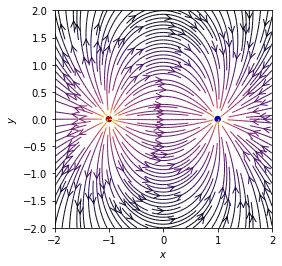

In [46]:
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()